# **Visual Data Analysis of the Cardiovascular Disease Dataset**

*by Natalia Zelenko*

**Dataset:** Cardiovascular Disease Dataset

**Goal:** Explore how different visualization techniques (histograms, box plots, scatter plots, violins, count plots) reveal structure, patterns, and outliers in health-related data, and how design choices—particularly colour palettes—shape the way these visuals are interpreted.

**About the dataset:**

The dataset contains medical examination records for roughly 70,000 patients, including demographic, lifestyle, and clinical features such as age, gender, height, weight, blood pressure, cholesterol, glucose levels, smoking, alcohol intake, and physical activity. The target variable cardio indicates whether cardiovascular disease was diagnosed. Although the dataset circulates widely in open-source educational contexts, its exact origin is not fully documented.

**Note on the plot choices:**

The choice of visualizations in this notebook follows the structure of the assignment rather than a free-form analytical plan. Each plot type and variable combination was selected to address a specific task requirement, which is why the sequence may appear eclectic when viewed as a unified narrative.

## **1. Preparatory Steps**

### **1.1 Imports and setup**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

pd.set_option("display.max.columns", 100)
%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

In [2]:
data_url_str = 'data/cardiovascular.data.csv'

### **1.2 Loading the dataset into a Pandas DataFrame**

In [3]:
data_df = pd.read_csv(data_url_str, sep=';')
data_df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### **1.3 General overview**

In [4]:
rows, cols = data_df.shape
print(f'The Cardiovascular Disease dataset has {rows} observations and {cols} variables.')

The Cardiovascular Disease dataset has 70000 observations and 13 variables.


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


All variables are numeric or encoded as numeric. The dataset contains 70,000 complete records across 13 variables, with no explicitly missing values reported in the .info() output.

The categorical variables are cast to the category type to ensure efficient storage and correct interpretation.

In [6]:
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
data_df[categorical_cols] = data_df[categorical_cols].astype('category')

In [7]:
data_df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0


**The ap_hi (systolic blood pressure) and ap_lo (diastolic blood pressure) variables show abnormally wide ranges and high variance** due to apparent data entry errors, for instance, negative or unrealistic blood pressure values. This will need to be considered during the analysis.

In [8]:
data_df.describe(include=['category']).T

,count,unique,top,freq
gender,70000,2,1,45530
cholesterol,70000,3,1,52385
gluc,70000,3,1,59479
smoke,70000,2,0,63831
alco,70000,2,0,66236
active,70000,2,1,56261
cardio,70000,2,0,35021


**The smoke and alco variables show unusually low proportions of positive responses**, which may indicate underreporting or sample bias. For the purposes of this analysis, the values are used as provided.

### **1.4 Creating a working copy of the dataset**

In [9]:
data_work_df = data_df.copy(deep=True)
data_work_df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## **2. Transformations**

### **2.1 Age: days -> years**

As required by the task, we transform the age variable—originally provided in days—into age_years (int). This is done by dividing by 365 and taking the integer part, since it is not customary to round a person’s age up.

In [10]:
data_work_df['age_years'] = (data_work_df['age'] / 365).astype(int)
data_work_df[['age', 'age_years']].head(10)

,age,age_years
0,18393,50
1,20228,55
2,18857,51
3,17623,48
4,17474,47
5,21914,60
6,22113,60
7,22584,61
8,17668,48
9,19834,54


In [11]:
data_work_df.drop(columns='age', inplace=True)

### **2.2 Create BMI feature**

As required by the task, we create a BMI variable by dividing weight (kg) by the square of height (m).

In [12]:
data_work_df['BMI'] = data_work_df['weight'] / (data_work_df['height'] / 100) ** 2

We then verify that the resulting values are within a realistic range and calculate the proportion of individuals with BMI values in the “normal” range (18.5–25).

In [13]:
data_work_df[['BMI']].describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,70000.0,27.556513,6.091511,3.471784,23.875115,26.374068,30.222222,298.666667


In [14]:
normal_bmi_share = ((data_work_df['BMI'] >= 18.5) & (data_work_df['BMI'] <= 25)).mean()
print(f"Share of people with normal BMI: {normal_bmi_share:.2%}")

Share of people with normal BMI: 36.86%


The resulting BMI values have a mean of approximately 27.6 and a standard deviation of about 6.1, with roughly 36.9% of individuals falling within the “normal” range (18.5–25).
**However, several extreme values are present, which are unrealistic and likely stem from incorrect height or weight records.** These outliers distort the overall range. For visual analysis, such cases will be excluded to ensure a more realistic depiction of the BMI distribution.

## **3. Colour palette**

The following colour palette is used throughout the visualizations. The use of an AI model for colour exploration was part of the teacher's instructions, but the thematic direction and mood were chosen deliberately. I guided the model toward a specific emotional tone and refined the palette based on those suggestions.

As part of this process, I asked the model (GPT-5) to establish a metaphor connecting the dataset to a Shakespearean tragedy and to propose colours that aligned with that atmosphere. I then adjusted the resulting palette to fit the desired visual mood.

**The final palette is inspired by Shakespeare's Hamlet — a thematic choice reflecting the dataset's focus on life, mortality, and human fragility.**

Throughout the analysis, colour is used both for clarity and for creating a cohesive visual atmosphere.

In [15]:
hamlet_colors = {
    "ghost_white": "#F9F9F9",
    "ash_gray": "#444444",
    "tragic_crimson": "#8B0000",
    "candlelight_gold": "#C6A300",
    "royal_indigo": "#443266",
    "fog_blue": "#6C7A89",
    "midnight_black": "#0D0D0D"
}

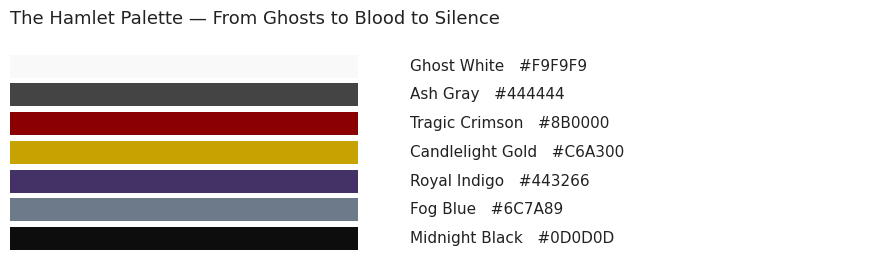

In [16]:
# function to format snake_case labels
def format_label(name):
    return name.replace("_", " ").title()

plt.figure(figsize=(9, 2.8))
for i, (name, color) in enumerate(reversed(hamlet_colors.items())):
    plt.barh(y=i, width=1, color=color)
    plt.text(1.15, i, f"{format_label(name)}   {color}",
             va='center', ha='left', fontsize=11, color='#222222')

plt.yticks([])
plt.xticks([])
plt.title("The Hamlet Palette — From Ghosts to Blood to Silence",
          fontsize=13, pad=15, loc='left', color='#222222')
plt.xlim(0, 2.5)
plt.box(False)
plt.tight_layout()
plt.show()

## **4. Histograms: Age, Height, and Weight**

First, we define a function for our preferred style of histogram for these features.

To better examine the distribution shape, the histograms are plotted with stat='density'.

In [17]:
def plot_histogram_neutral(df, column, title, xlabel, bins=25):
    plt.figure(figsize=(8, 5))

    sns.histplot(
        data=df,
        x=column,
        bins=bins,
        color=hamlet_colors['royal_indigo'],
        edgecolor=hamlet_colors['ash_gray'],
        linewidth=0.8,
        alpha=0.7,
        stat='density'
    )

    sns.kdeplot(
        data=df,
        x=column,
        color=hamlet_colors['ash_gray'],
        linewidth=3,
        alpha=0.5
    )

    plt.title(title, pad=10)
    plt.xlabel(xlabel)
    plt.ylabel('Density')
    plt.grid(True, color=hamlet_colors['fog_blue'], linewidth=0.2, alpha=0.7)
    plt.gca().set_facecolor(hamlet_colors["ghost_white"])
    plt.show()

### **4.1 Age**

In [18]:
data_work_df[['age_years']].describe().T

,count,mean,std,min,25%,50%,75%,max
age_years,70000.0,52.840671,6.766774,29.0,48.0,53.0,58.0,64.0


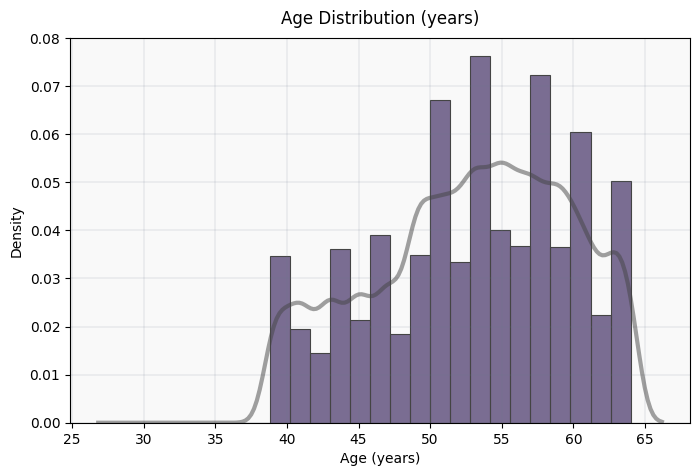

In [19]:
plot_histogram_neutral(data_work_df, 'age_years', 'Age Distribution (years)', 'Age (years)')

The histogram uses bins of roughly 1.4 years, which provide sufficient detail to reveal the distribution's shape without introducing excessive noise. **The age distribution is roughly normal but slightly right-skewed**, centered around a mean age of about 53 years and spanning mainly from the late forties to the late fifties.

### **4.2 Height**

In [20]:
data_work_df[['height']].describe().T

,count,mean,std,min,25%,50%,75%,max
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0


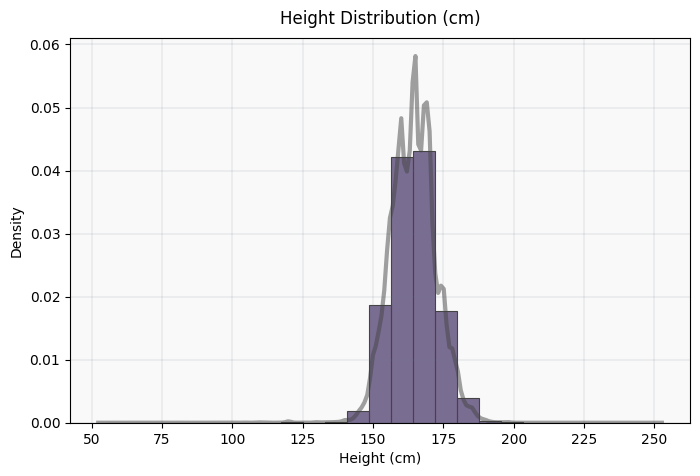

In [21]:
plot_histogram_neutral(data_work_df, 'height', 'Height Distribution (cm)', 'Height (cm)')

Earlier BMI calculations suggested that some height values might be erroneous. Since the dataset represents adults aged 29 and older, values below 140 cm or above 210 cm are unlikely to be plausible and are probably due to data entry errors or extreme outliers.
To obtain a more realistic view of the height distribution, we exclude those values from the visual analysis.

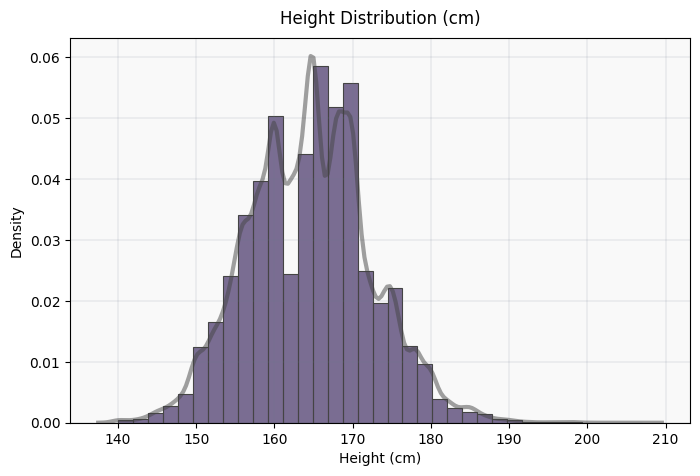

In [22]:
realistic_heights_df = data_work_df.query('height >= 140 and height <= 210')
plot_histogram_neutral(realistic_heights_df, 'height', 'Height Distribution (cm)', 'Height (cm)', bins=35)

The histogram was plotted with 35 bins, which provided a clear and balanced representation of the height distribution. This binning preserved enough detail to reveal the distribution's internal structure while aligning smoothly with the KDE curve.

The resulting distribution is approximately normal, centered around a mean height of about 165 cm, with most values falling between 155 and 175 cm. The slight rightward tail suggests the presence of a smaller number of taller individuals, which is consistent with expected variation in an adult population.

The height distribution also shows minor secondary peaks around 155 cm and 175 cm, likely reflecting the overlap of male and female subpopulations.

### **4.3 Weight**

In [23]:
data_work_df[['weight']].describe().T

,count,mean,std,min,25%,50%,75%,max
weight,70000.0,74.20569,14.395757,10.0,65.0,72.0,82.0,200.0


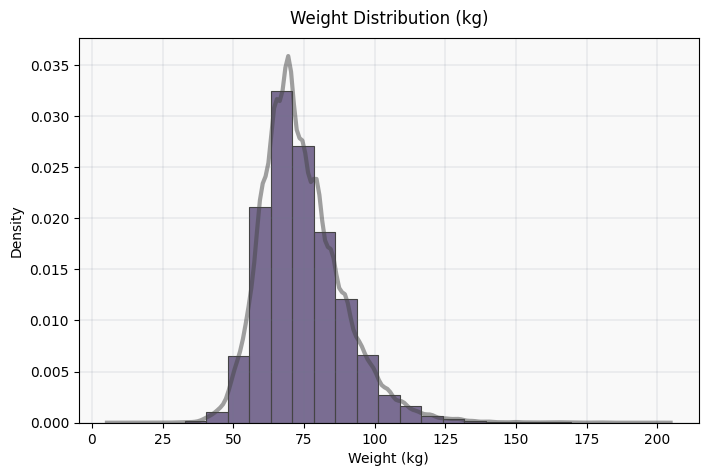

In [24]:
plot_histogram_neutral(data_work_df, 'weight', 'Weight Distribution (kg)', 'Weight (kg)')

The weight variable also includes some implausible values. Since the dataset represents adults, weights below 40 kg or above 150 kg are unlikely and probably result from data entry errors or extreme outliers. These records are excluded from the visual analysis to provide a more realistic view of the weight distribution.

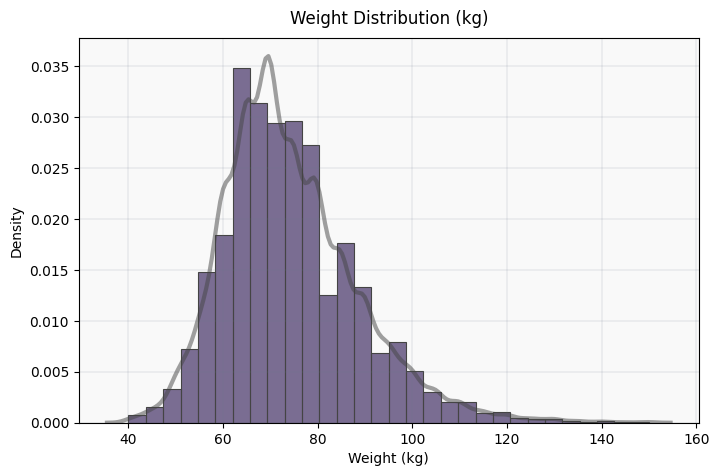

In [25]:
realistic_weights_df = data_work_df.query('weight >= 40 and weight <= 150')
plot_histogram_neutral(realistic_weights_df, 'weight', 'Weight Distribution (kg)', 'Weight (kg)', bins=30)

The histogram with 30 bins provides a balanced and interpretable view of the weight distribution.

It clearly shows a skewed shape, with a single dominant peak around 70 kg and a right tail extending to roughly 120–130 kg. The distribution is unimodal and slightly right-skewed rather than perfectly normal, which aligns with typical adult weight variation.

## **5. Box Plots and Outliers: Height and Weight**

First, we define a function for our preferred style of boxplot for these features.

In [26]:
def plot_boxplot_outliers(df, col, title, xlabel, xlim=None):
    plt.figure(figsize=(16, 3))
    sns.boxplot(
        x=df[col],
        boxprops={'facecolor': hamlet_colors['candlelight_gold'],
                  'edgecolor': hamlet_colors['royal_indigo'],
                  'alpha': 0.6, 'linewidth': 3},
        medianprops={'color': hamlet_colors['tragic_crimson'],
                     'linewidth': 2, 'linestyle': '--', 'alpha': 0.6},
        whiskerprops={'color': hamlet_colors['royal_indigo'],
                      'linewidth': 3, 'alpha': 0.6},
        capprops={'color': hamlet_colors['royal_indigo'],
                  'linewidth': 3, 'alpha': 0.6},
        flierprops={'marker': 'x',
                    'markeredgecolor': hamlet_colors['tragic_crimson'],
                    'alpha': 0.2, 'markersize': 5},
        width=0.3,
    )
    plt.title(title, pad=10)
    plt.xlabel(xlabel)
    plt.gca().set_facecolor(hamlet_colors['ghost_white'])
    if xlim:
        plt.xlim(xlim)
    plt.show()


### **5.1 Height**

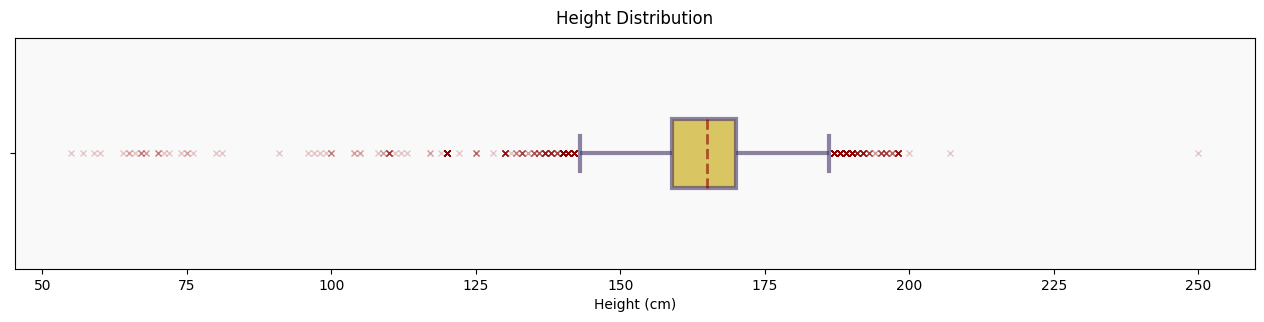

In [27]:
plot_boxplot_outliers(data_work_df, 'height', 'Height Distribution', 'Height (cm)')


As expected from earlier observations, the height records do contain clear data-entry errors and extreme outliers.

To examine these more systematically, we explore the IQR.

In [28]:
Q1, Q2, Q3 = data_work_df['height'].quantile([0.25, 0.5, 0.75])
IQR = Q3 - Q1

print(f"Q1: {Q1:.1f} cm")
print(f"Q2 (median): {Q2:.1f} cm")
print(f"Q3: {Q3:.1f} cm")
print(f'IQR: {IQR:.1f} cm')

Q1: 159.0 cm
Q2 (median): 165.0 cm
Q3: 170.0 cm
IQR: 11.0 cm


Now let us identify the outliers based on the IQR, and calculate the percentage of outliers.

In [29]:
lower_bound_height = Q1 - 1.5 * IQR
upper_bound_height = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound_height:.1f} cm")
print(f"Upper bound: {upper_bound_height:.1f} cm")

outliers = data_work_df[(data_work_df['height'] < lower_bound_height) |
                        (data_work_df['height'] > upper_bound_height)]

print(f"Number of outliers: {len(outliers)}")

outlier_percentage = len(outliers) / len(data_work_df) * 100
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

Lower bound: 142.5 cm
Upper bound: 186.5 cm
Number of outliers: 519
Percentage of outliers: 0.74%


Outliers identified by the IQR rule were reviewed. Values below 140 cm or above 190 cm appear unrealistic for adults and are candidates for removal as probable data-entry errors or extreme cases.

However, before making such a decision, we would need to explore the domain more thoroughly.

Now that we have identified the outliers, we can look at the boxplot for the range of heights we previously considered realistic for adult individuals when examining the histogram.

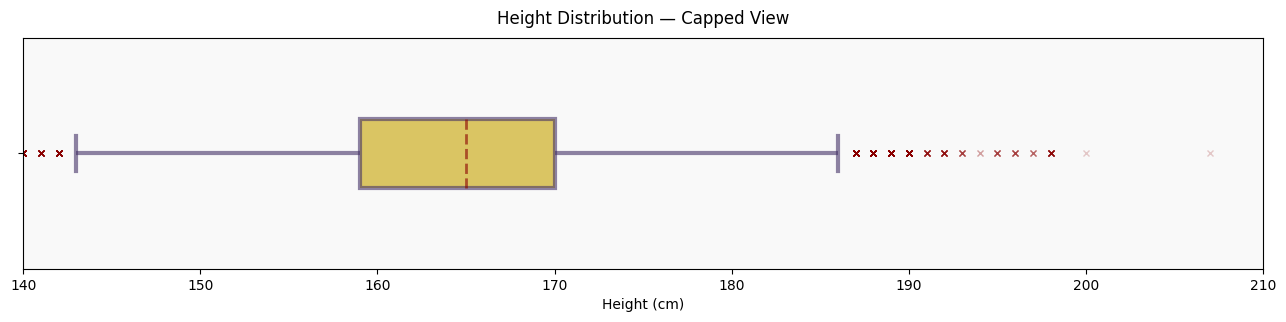

In [30]:
plot_boxplot_outliers(data_work_df, 'height', "Height Distribution — Capped View", 'Height (cm)', xlim=(140, 210))

Here we see that, even though the x-axis is capped, the boxplot still reflects the original IQR, so the 1.5xIQR rule continues to flag several outliers.

### **5.2 Weight**

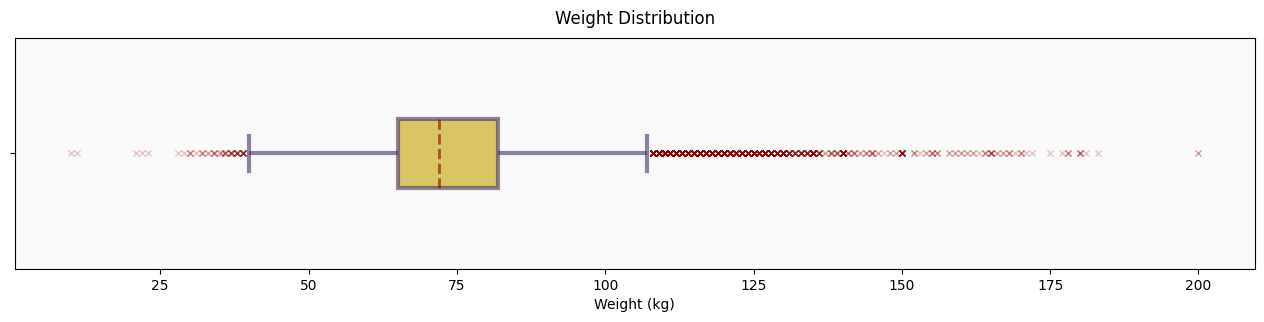

In [31]:
plot_boxplot_outliers(data_work_df, 'weight', 'Weight Distribution', 'Weight (kg)')


Once again, as seen in earlier observations, the weight records contain clear data-entry errors or extreme outliers. Unlike height, where we saw more very low values, here we observe a larger number of high-weight outliers.

To analyse these more systematically, we explore the IQR.

In [32]:
Q1, Q2, Q3 = data_work_df['weight'].quantile([0.25, 0.5, 0.75])
IQR = Q3 - Q1

print(f"Q1: {Q1:.1f} kg")
print(f"Q2 (median): {Q2:.1f} kg")
print(f"Q3: {Q3:.1f} kg")
print(f'IQR: {IQR:.1f} kg')

Q1: 65.0 kg
Q2 (median): 72.0 kg
Q3: 82.0 kg
IQR: 17.0 kg


Now let us identify the outliers based on the IQR, and calculate the percentage of outliers.

In [33]:
lower_bound_weight = Q1 - 1.5 * IQR
upper_bound_weight = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound_weight:.1f} kg")
print(f"Upper bound: {upper_bound_weight:.1f} kg")

outliers = data_work_df[(data_work_df['weight'] < lower_bound_weight) |
                        (data_work_df['weight'] > upper_bound_weight)]

print(f"Number of outliers: {len(outliers)}")

outlier_percentage = len(outliers) / len(data_work_df) * 100
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

Lower bound: 39.5 kg
Upper bound: 107.5 kg
Number of outliers: 1819
Percentage of outliers: 2.60%


Outliers identified by the IQR rule were reviewed. Values under 39 kg or over 108 kg appear unrealistic for adult individuals and are candidates for removal as probable data-entry errors or extreme cases.

However, before making such a decision, we would need to explore the domain.

Note that, compared to height, the weight feature shows a higher proportion of outliers (2.6%). This is expected, since in addition to apparent data errors, extreme weight values can occur naturally in the population, unlike extreme heights.

Now that we have identified the outliers, we can look at the boxplot for the range of weights we previously considered realistic for adults when examining the histogram.

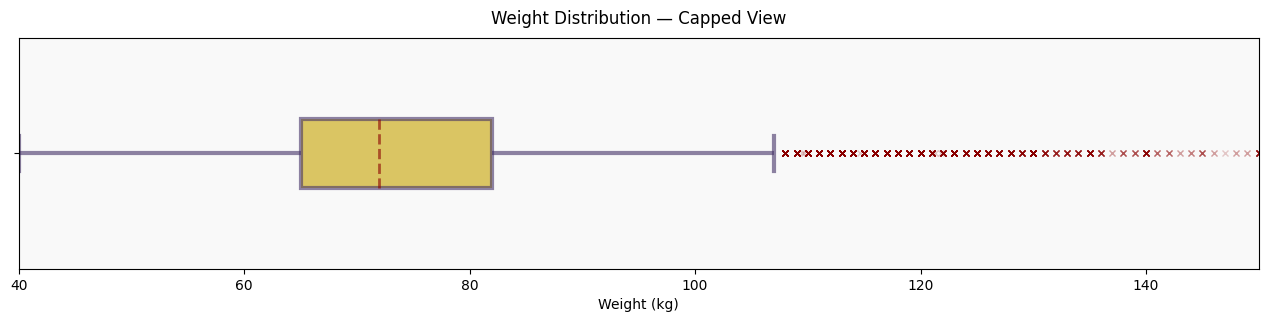

In [34]:
plot_boxplot_outliers(data_work_df, 'weight', "Weight Distribution — Capped View", 'Weight (kg)', xlim=(40, 150))

Here we see that, even with the x-axis capped, the 1.5xIQR rule still identifies many high-weight outliers, while the lower bound is barely reached.

## **6. Scatter Plots**

In [35]:
def plot_scatter_neutral(df, xcol, ycol, title, xlabel, ylabel, xlim=None, ylim=None, figsize=(7.5, 5.5)):
    plt.figure(figsize=figsize)

    sns.scatterplot(
        data=df,
        x=xcol,
        y=ycol,
        color=hamlet_colors['fog_blue'],
        alpha=0.9,
        linewidth=0.5,
        s=40,
        marker="x"
    )

    if xlim:
      plt.xlim(xlim)

    if ylim:
      plt.ylim(ylim)

    sns.regplot(
        data=df,
        x=xcol,
        y=ycol,
        scatter=False,
        color=hamlet_colors['midnight_black'],
        line_kws={"linewidth": 3, 'alpha': 0.7, 'linestyle': 'dashed'}
    )

    plt.title(title, pad=10)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.gca().set_facecolor(hamlet_colors["ghost_white"])
    plt.show()

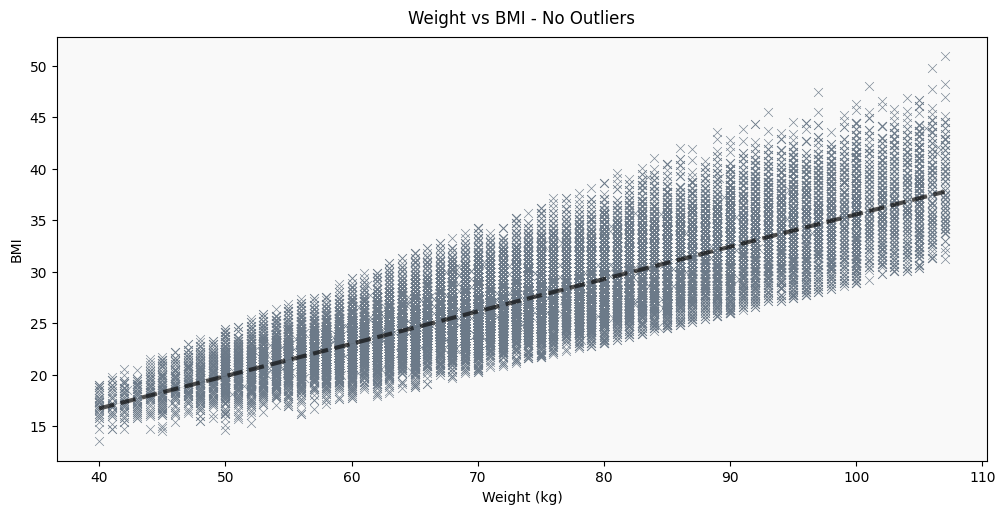

In [36]:
no_outliers_df = data_work_df.query(
    "(@lower_bound_height <= height <= @upper_bound_height) and "
    "(@lower_bound_weight <= weight <= @upper_bound_weight)"
)

plot_scatter_neutral(
    no_outliers_df, xcol='weight', ycol='BMI',
    title="Weight vs BMI - No Outliers", xlabel="Weight (kg)", ylabel="BMI", figsize=(12, 5.5))

**BMI vs Weight:** The relationship is strong and appears almost linear, since BMI is mathematically derived from weight and height. With the height range restricted after outlier removal, BMI increases mainly as a function of weight, while height differences introduce only minor variation.

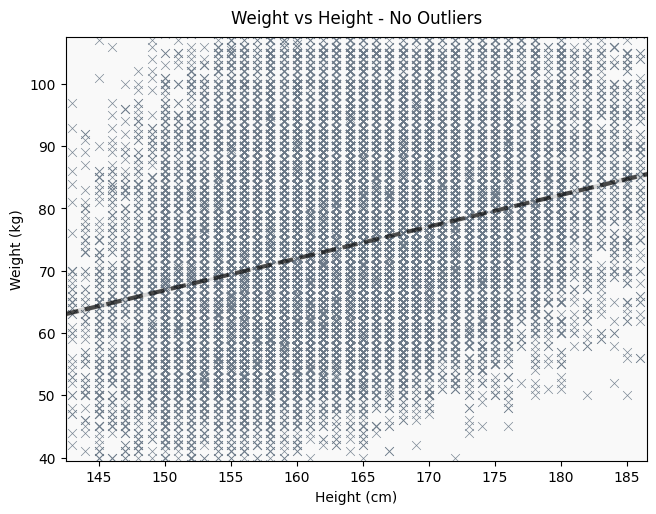

In [37]:
plot_scatter_neutral(
    data_work_df, xcol='height', ycol='weight',
    xlim=(lower_bound_height, upper_bound_height), ylim=(lower_bound_weight, upper_bound_weight,),
    title="Weight vs Height - No Outliers", xlabel="Height (cm)", ylabel="Weight (kg)")

**Weight vs Height:** There is a clear positive correlation: taller individuals generally weigh more. The pattern is roughly linear, but with noticeable vertical spread, meaning people of the same height can differ significantly in weight.

## **7. Violin Plot: Height and Gender**

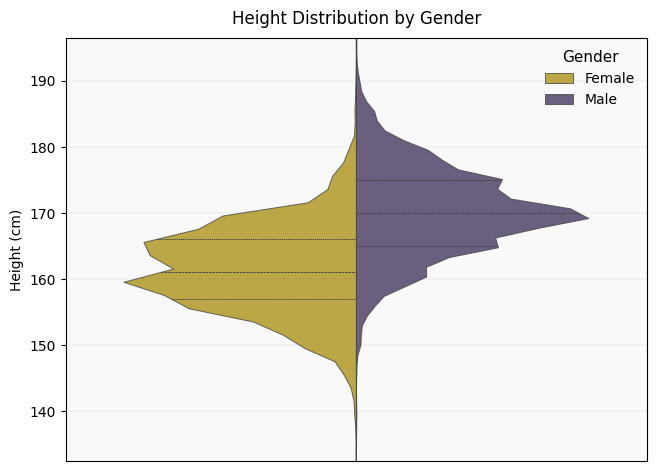

In [38]:
df_melted = data_work_df.melt(id_vars='gender', value_vars=['height'])
plt.figure(figsize=(7.5, 5.5))

sns.violinplot(
    data=df_melted,
    x='variable',
    y='value',
    hue='gender',
    split=True,
    density_norm='count',
    inner='quartile',
    linewidth=0.7,
    alpha=0.8,
    palette={1: hamlet_colors['candlelight_gold'], 2: hamlet_colors['royal_indigo']},
    edgecolor=hamlet_colors['ash_gray']
)

plt.ylim(lower_bound_height-10, upper_bound_height+10)

plt.title("Height Distribution by Gender", pad=10)
plt.xlabel("")
plt.ylabel("Height (cm)")

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles, ['Female', 'Male'],
    title='Gender',
    title_fontsize=11,
    fontsize=10,
    frameon=False,
    facecolor=hamlet_colors['ghost_white']
)

plt.xticks([])

plt.grid(True, color=hamlet_colors['fog_blue'], linewidth=0.2, alpha=0.4)
plt.gca().set_facecolor(hamlet_colors["ghost_white"])

plt.show()


**Height shows a clear dependence on gender**, with male participants being generally taller.

## **8. Count plot: Cardiovascular Disease by Age**

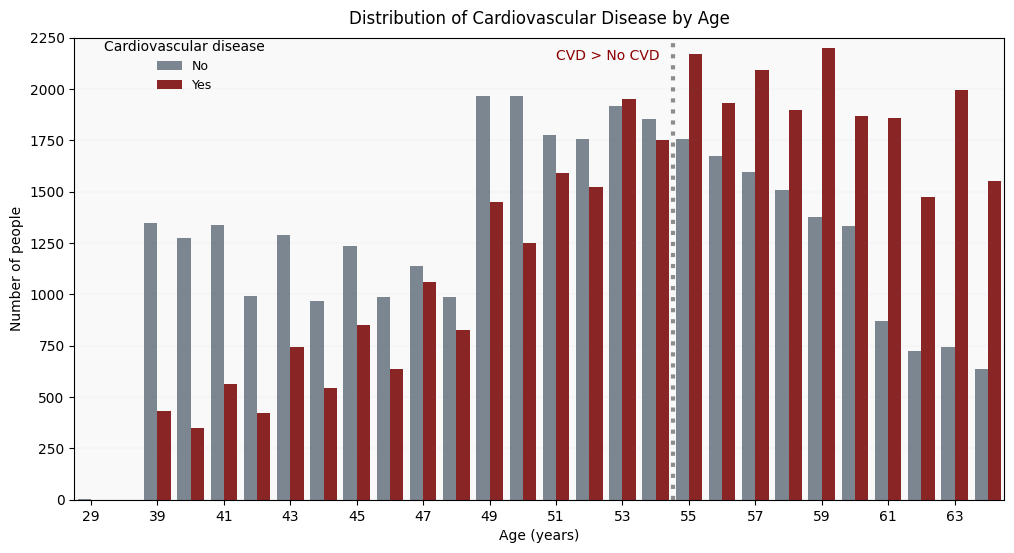

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(data=data_work_df, x='age_years', hue='cardio',
              palette=[hamlet_colors['fog_blue'], hamlet_colors['tragic_crimson']],
              saturation=0.8, alpha=0.9)
plt.title('Distribution of Cardiovascular Disease by Age', pad=10)
plt.xlabel('Age (years)')
plt.ylabel('Number of people')
plt.legend(title='Cardiovascular disease', labels=['No', 'Yes'],
           title_fontsize=10, fontsize=9, frameon=False,
           facecolor=hamlet_colors['ghost_white'],
           loc='upper left', bbox_to_anchor=(0.02, 1.02))
plt.xticks(plt.xticks()[0][::2])
plt.ylim(0, 2250)

ages = sorted(data_work_df['age_years'].unique())
pos_55 = ages.index(55)
plt.axvline(x=pos_55-0.475, color=hamlet_colors['ash_gray'], linestyle='dotted', alpha=0.6, linewidth=3)
plt.text(pos_55-4, 2140, "CVD > No CVD", fontsize=10, color=hamlet_colors['tragic_crimson'], alpha=1)

plt.grid(True, axis='y', color=hamlet_colors['fog_blue'], linewidth=0.2, alpha=0.2)
plt.gca().set_facecolor(hamlet_colors["ghost_white"])

plt.show()


**The plot shows a strong age-related increase in cardiovascular disease.** At younger ages, non-CVD cases dominate, but the proportion of CVD cases grows steadily with age. The shift becomes especially pronounced in the late 50s and early 60s, where CVD counts clearly exceed non-CVD counts for most age groups.
The first crossover occurs at age 53, but from age 55 onward the number of CVD cases consistently exceeds non-CVD cases.

## **9. Gender and Reporting Alcohol Consumption**

We have previously noted that the proportion of people reporting alcohol consumption in this dataset is unusually small.

Here, we check whether women or men are more likely to report drinking.

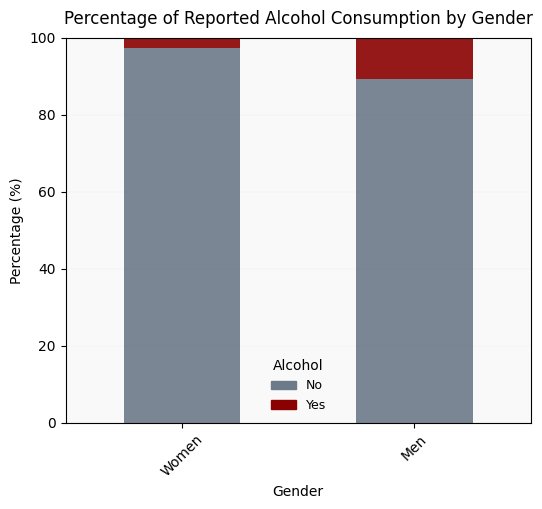

In [40]:
alco_pivot = (
    data_work_df.groupby('gender', observed=False)['alco']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
    .mul(100)
)

alco_pivot.index = ['Women', 'Men']
alco_pivot.columns = ['No', 'Yes']

alco_pivot.plot(
    kind='bar',
    stacked=True,
    color=[hamlet_colors['fog_blue'], hamlet_colors['tragic_crimson']],
    alpha=0.9,
    figsize=(6,5)
)

plt.title('Percentage of Reported Alcohol Consumption by Gender', pad=10)
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.xticks([0,1], ['Women', 'Men'], rotation=45)
plt.ylim(0, 100)

legend_handles = [
    Patch(color=hamlet_colors['fog_blue'], label='No'),
    Patch(color=hamlet_colors['tragic_crimson'], label='Yes')
]
plt.legend(handles=legend_handles, title='Alcohol', labels=['No', 'Yes'],
           title_fontsize=10, fontsize=9, frameon=False,
           facecolor=hamlet_colors['ghost_white'])
plt.grid(True, axis='y', color=hamlet_colors['fog_blue'], linewidth=0.2, alpha=0.15)
plt.gca().set_facecolor(hamlet_colors["ghost_white"])
plt.show()


Men report alcohol consumption more often than women, though the overall reporting rates remain very low.

## **10. The Cholesterol Question**

There is an assumption that for smoking men aged 60–65 with systolic pressure below 120 and normal cholesterol, the risk of CVD is about five times lower compared to those with systolic pressure in the range 160–180 and cholesterol level 3.

In this section, we will check whether this statement holds using the dataset.


In [41]:
base = data_work_df[
    (data_work_df['gender'] == 2) &      # men
    (data_work_df['smoke'] == 1) &       # smokers
    (data_work_df['age_years'] >= 60) &
    (data_work_df['age_years'] <= 65)
]

group_a = base[(base['ap_hi'] < 120) & (base['cholesterol'] == 1)]
group_b = base[(base['ap_hi'] >= 160) & (base['ap_hi'] < 180) & (base['cholesterol'] == 3)]


In [42]:
a_rate = pd.to_numeric(group_a['cardio'], errors='coerce').mean()
b_rate = pd.to_numeric(group_b['cardio'], errors='coerce').mean()

print(f"Group A (ap_hi < 120 & chol=1): n={len(group_a)}, CVD={a_rate:.3f}")
print(f"Group B (160 ≤ ap_hi < 180 & chol=3): n={len(group_b)}, CVD={b_rate:.3f}")
print(f"Ratio (B / A): {b_rate / a_rate:.2f}")

Group A (ap_hi < 120 & chol=1): n=54, CVD=0.278
Group B (160 ≤ ap_hi < 180 & chol=3): n=15, CVD=0.933
Ratio (B / A): 3.36


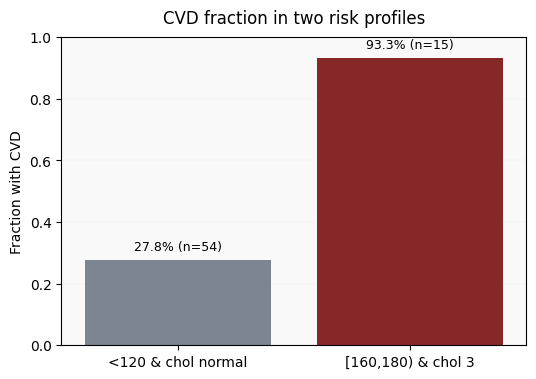

In [43]:
plot_df = pd.DataFrame({
    "group": ["<120 & chol normal", "[160,180) & chol 3"],
    "cvd_rate": [a_rate, b_rate],
    "n": [len(group_a), len(group_b)]
})

plt.figure(figsize=(6, 4))
sns.barplot(
    data=plot_df,
    x="group",
    y="cvd_rate",
    hue='group',
    legend=False,
    palette=[hamlet_colors['fog_blue'], hamlet_colors['tragic_crimson']],
    alpha=0.9
)
plt.ylim(0, 1)
plt.ylabel("Fraction with CVD")
plt.xlabel("")
for i, row in plot_df.iterrows():
    plt.text(i, row["cvd_rate"] + 0.02, f"{row['cvd_rate']*100:.1f}% (n={row['n']})",
             ha="center", va="bottom", fontsize=9)
plt.title("CVD fraction in two risk profiles", pad=10)
plt.grid(True, axis='y', color=hamlet_colors['fog_blue'], linewidth=0.2, alpha=0.15)
plt.gca().set_facecolor(hamlet_colors["ghost_white"])
plt.show()

Among smoking men aged 60–65, the fraction of people with cardiovascular disease was 27.8% in the group with systolic pressure below 120 mm Hg and normal cholesterol, and 93.3% in the group with pressure between 160–180 mm Hg and cholesterol well above normal. Thus, **the risk of CVD in the second group is about 3.4 times higher, not five times as stated.** The direction of the relationship is confirmed (higher blood pressure and cholesterol strongly increase CVD risk), but the magnitude differs. It is also worth noting that earlier we observed **an unrealistically small proportion of smokers in the dataset**, so the results for this subgroup might be affected by underreporting.

## **11. CatPlot(): Are the Binary Features Balanced?**

We have already noticed that some binary features appear highly imbalanced. Here we visualize their distributions more directly.

In [44]:
binary_features = ['smoke', 'alco', 'active', 'cardio']
melted_df = data_work_df[binary_features].melt(var_name='feature', value_name='value')


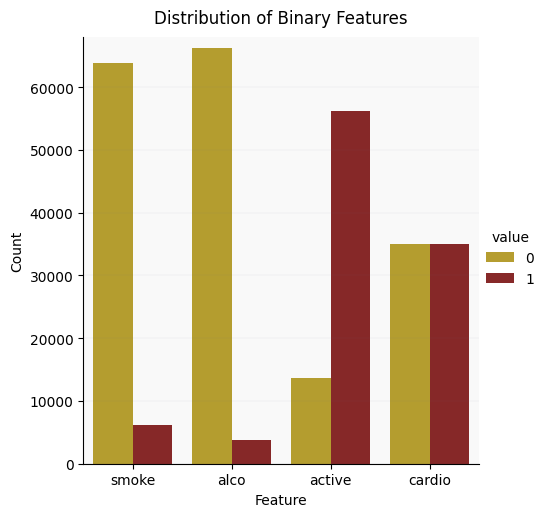

In [45]:
sns.catplot(
    data=melted_df,
    x='feature',
    kind='count',
    hue='value',
    palette=[hamlet_colors['candlelight_gold'], hamlet_colors['tragic_crimson']],
    alpha=0.9,
    saturation=0.75
)
plt.title('Distribution of Binary Features', pad=10)
plt.xlabel('Feature')
plt.ylabel('Count')
plt.ylim(0, 68000)
plt.grid(True, axis='y', color=hamlet_colors['fog_blue'], linewidth=0.2, alpha=0.25)
plt.gca().set_facecolor(hamlet_colors["ghost_white"])
plt.show()


The plot confirms that the binary self-reported features are strongly imbalanced.

Smoking and alcohol consumption are reported by only a small minority, while most participants identify as physically active.

**This pattern is consistent with self-reporting bias: negative or health-risk behaviors tend to be underreported, while positive behaviors tend to be overstated.**